1. Import all needed tools
2. Define all cleaned datas.
3. Goal: Seeing the counts, basic statisctics and basic graphs to create relationship between datasets and datas

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine, types
from sqlalchemy import text 

In [3]:
c_1 = pd.read_csv('../data/Cleaned/cleaned_world_marriage.csv')
c_2 = pd.read_csv('../data/Cleaned/cleaned_age_at_marriage_women.csv')
c_3 = pd.read_csv('../data/Cleaned/cleaned_marriage-rate-per-1000-inhabitants.csv')
c_4 = pd.read_csv('../data/Cleaned/cleaned_marriage-rates-in-1990-vs-2020.csv')
c_5 = pd.read_csv('../data/Cleaned/cleaned_share-of-births-outside-marriage.csv')
c_6 = pd.read_csv('../data/Cleaned/cleaned_share-of-men-in-england-and-wales-who-have-ever-married-by-age.csv')
c_7 = pd.read_csv('../data/Cleaned/cleaned_share-of-single-parent-households.csv')
c_8 = pd.read_csv('../data/Cleaned/cleaned_share-of-women-in-england-and-wales-who-have-ever-married-by-age.csv')
c_9 = pd.read_csv('../data/Cleaned/cleaned_unpopulation_dataportal.csv')
c_10 = pd.read_csv('../data/processed/countries.csv',  header=5, low_memory=False)

In [4]:
print(c_1.info())
print(c_1.describe())
print(c_1.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271417 entries, 0 to 271416
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   country                     271417 non-null  object
 1   age_group                   271417 non-null  object
 2   sex                         271417 non-null  object
 3   marital_status              271417 non-null  object
 4   data_process                271417 non-null  object
 5   data_collection_start_year  271417 non-null  int64 
 6   data_collection_end_year    271417 non-null  int64 
 7   data_source                 271417 non-null  object
dtypes: int64(2), object(6)
memory usage: 16.6+ MB
None
       data_collection_start_year  data_collection_end_year
count               271417.000000             271417.000000
mean                  1996.953956               1997.051633
std                     14.246312                 14.285932
min                   19

<Figure size 1200x800 with 0 Axes>

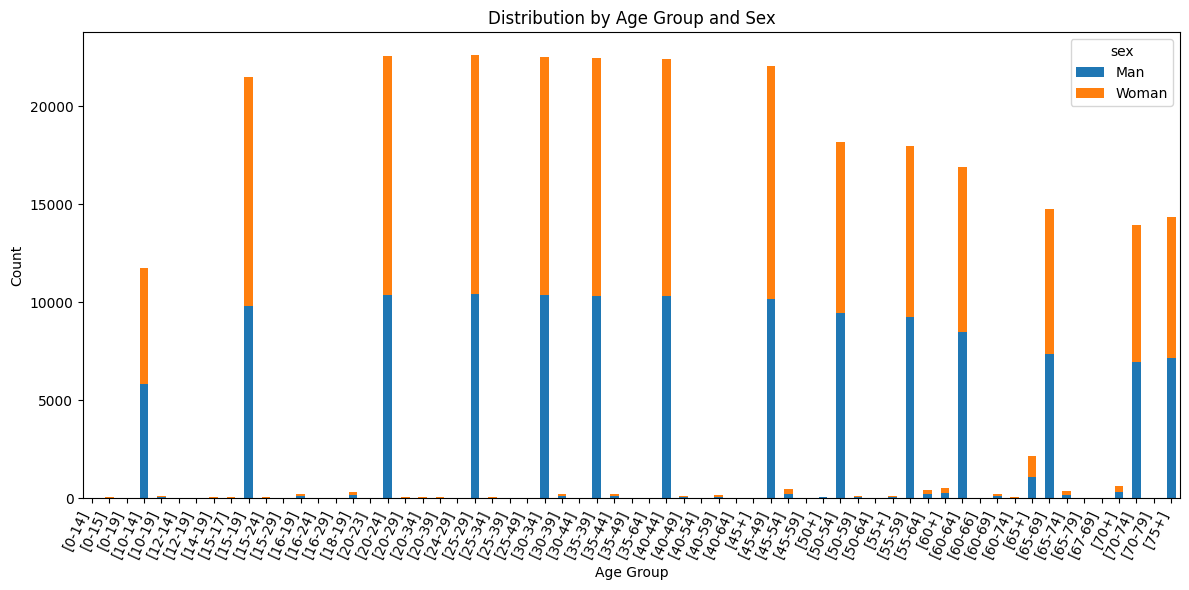

In [5]:
plt.figure(figsize=(12,8))
age_sex_counts = c_1.groupby(['age_group', 'sex']).size().unstack()
age_sex_counts.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribution by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=65, ha='right')
plt.tight_layout()
plt.show()

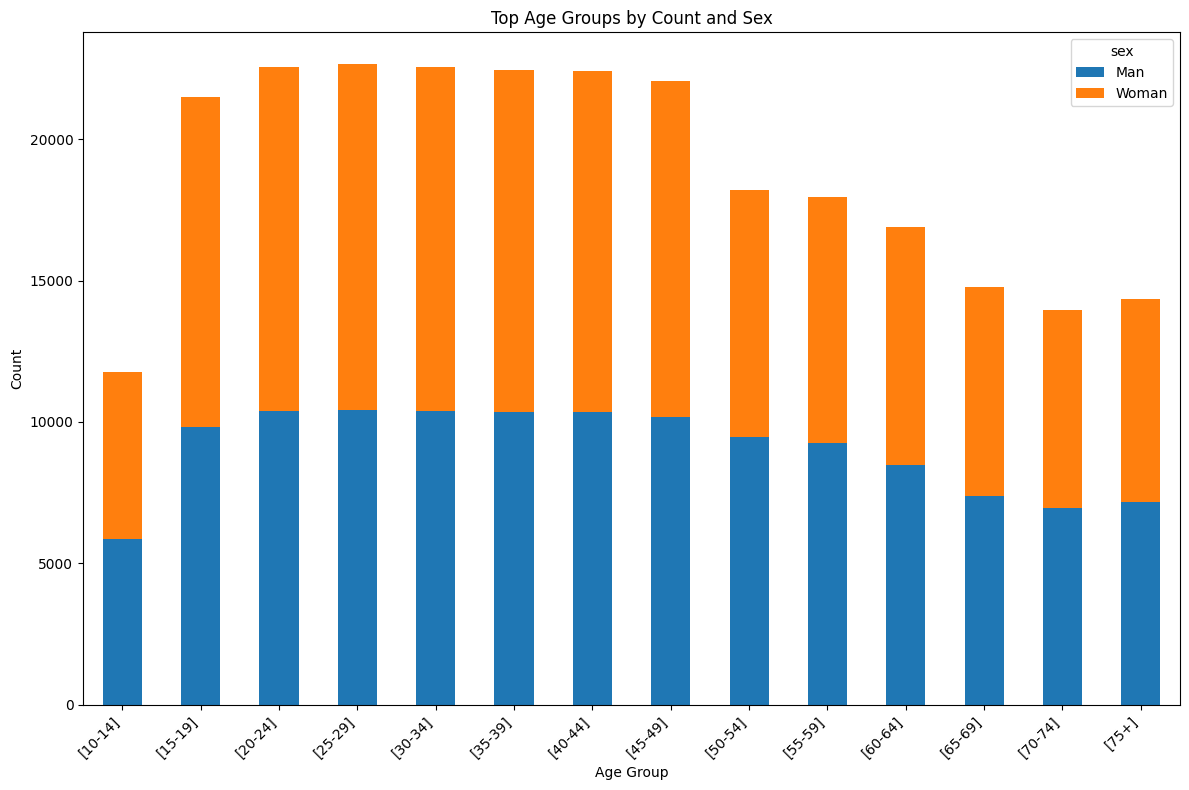

In [6]:
top_age_groups = c_1['age_group'].value_counts().nlargest(14).index
age_sex_counts_top = c_1[c_1['age_group'].isin(top_age_groups)].groupby(['age_group', 'sex']).size().unstack()
age_sex_counts_top.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Top Age Groups by Count and Sex')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

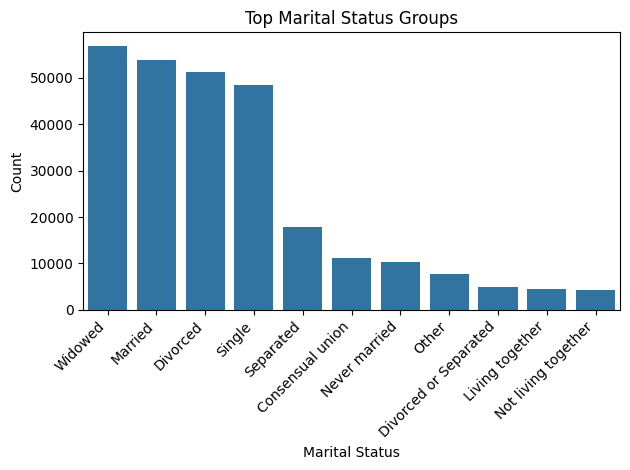

In [7]:
marital_counts = c_1['marital_status'].value_counts()
top_n = 10
top_categories = marital_counts.index[:top_n]
c_1['marital_status_grouped'] = c_1['marital_status'].apply(lambda x: x if x in top_categories else 'Other')

grouped_counts = c_1['marital_status_grouped'].value_counts()
sns.barplot(x=grouped_counts.index, y=grouped_counts.values)
plt.title('Top Marital Status Groups')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

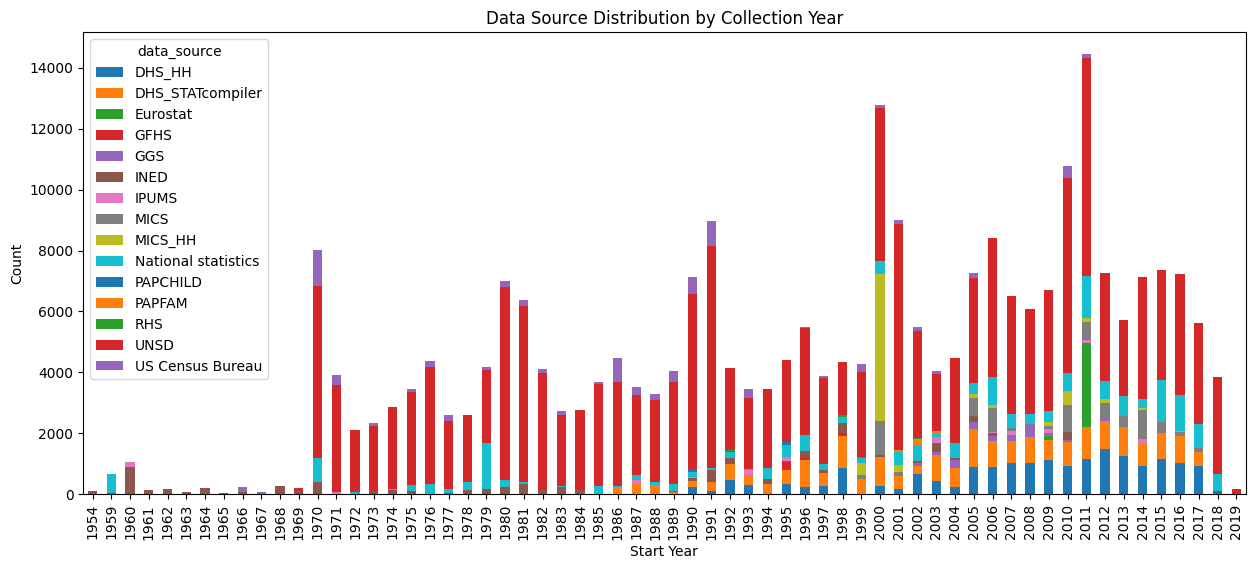

In [ ]:
source_year_counts = c_1.groupby(['data_collection_start_year', 'data_source']).size().unstack(fill_value=0)
source_year_counts.plot(kind='bar', stacked=True, figsize=(15,6))
plt.title('Data Source Distribution by Collection Year')
plt.xlabel('Start Year')
plt.ylabel('Count')
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              1047 non-null   object 
 1   code                                 1047 non-null   object 
 2   year                                 1047 non-null   int64  
 3   mean_age_of_women_at_first_marriage  1047 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.8+ KB
None
              year  mean_age_of_women_at_first_marriage
count  1047.000000                          1047.000000
mean   2005.023878                            27.683043
std       8.689371                             2.532542
min    1990.000000                            20.000000
25%    1998.000000                            25.900000
50%    2005.000000                            27.700000
75%    2012.000000                    

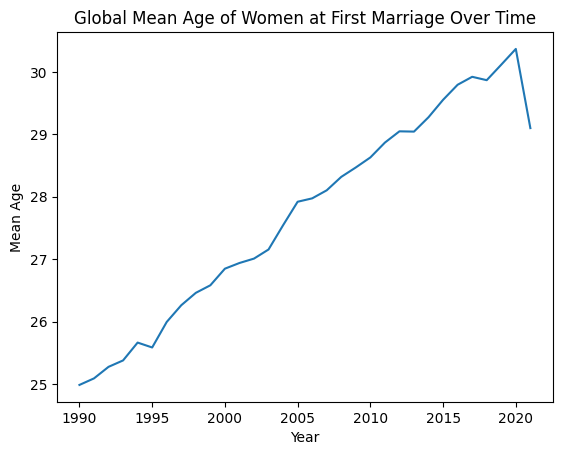

In [8]:
# EDA & Visualization
print(c_2.info())
print(c_2.describe())
print(c_2.head())

# Global mean age over time
yearly_age = c_2.groupby('year')['mean_age_of_women_at_first_marriage'].mean().reset_index()
sns.lineplot(data=yearly_age, x='year', y='mean_age_of_women_at_first_marriage')
plt.title('Global Mean Age of Women at First Marriage Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.show()

C:\Users\yukse\AppData\Local\Temp\ipykernel_7380\1428218613.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, y='Country or area', x='Percentage', palette='viridis')


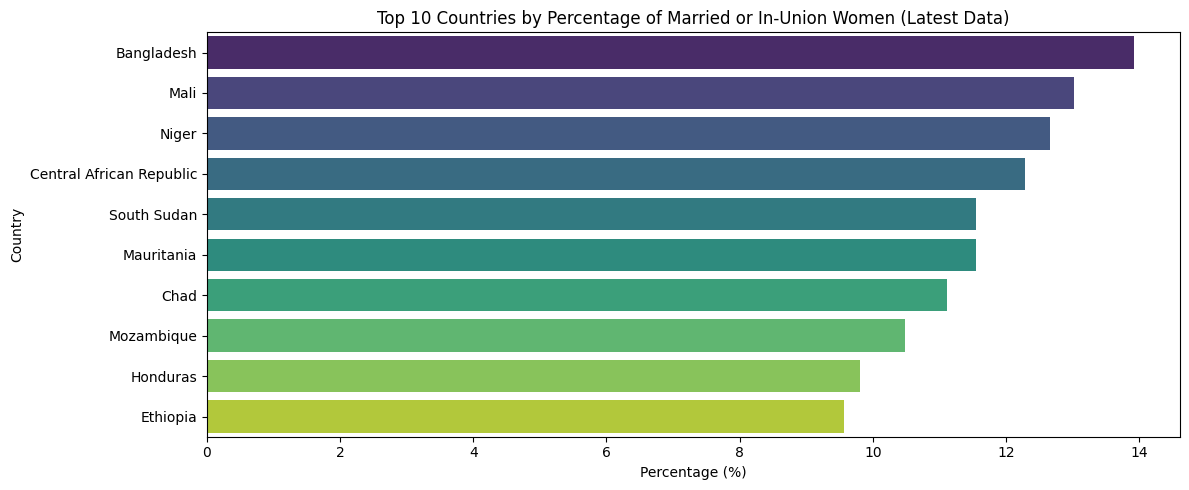

In [9]:
idx = c_10.groupby('Country or area')['Year'].idxmax()
latest = c_10.loc[idx]
top_countries = latest[['Country or area', 'Percentage']].sort_values('Percentage', ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(data=top_countries, y='Country or area', x='Percentage', palette='viridis')
plt.title('Top 10 Countries by Percentage of Married or In-Union Women (Latest Data)')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

C:\Users\yukse\AppData\Local\Temp\ipykernel_7380\4213496976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=agegroup_mean, x='AgeGroup', y='Percentage', palette='crest')


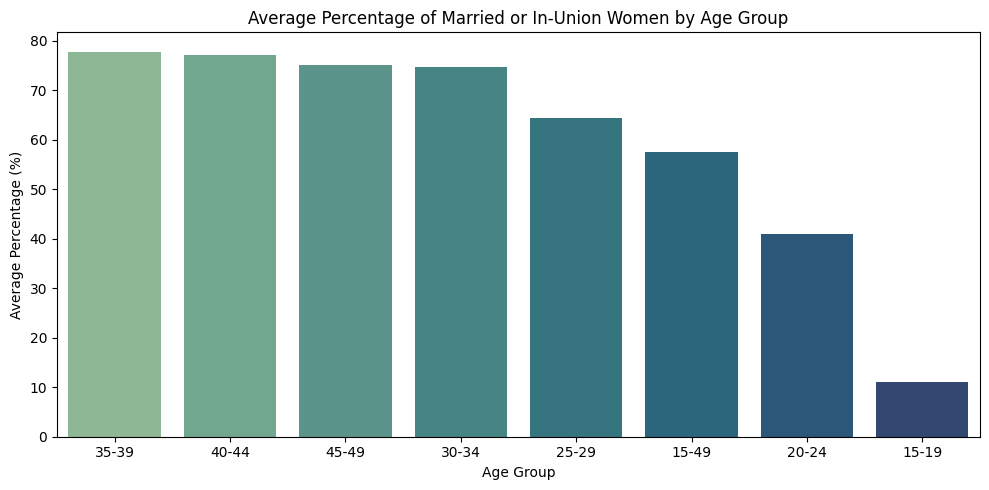

In [10]:
agegroup_mean = c_10.groupby('AgeGroup')['Percentage'].mean().reset_index().sort_values('Percentage', ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(data=agegroup_mean, x='AgeGroup', y='Percentage', palette='crest')
plt.title('Average Percentage of Married or In-Union Women by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Percentage (%)')
plt.tight_layout()
plt.show()

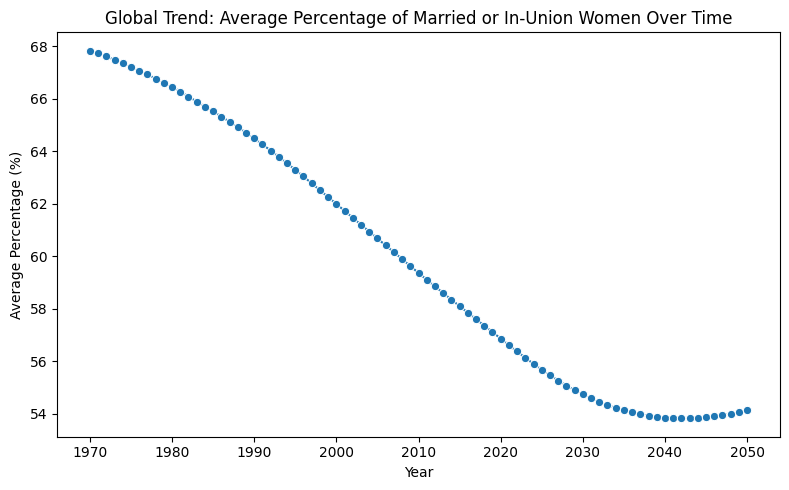

In [11]:
global_year = c_10.groupby('Year')['Percentage'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=global_year, x='Year', y='Percentage', marker='o')
plt.title('Global Trend: Average Percentage of Married or In-Union Women Over Time')
plt.xlabel('Year')
plt.ylabel('Average Percentage (%)')
plt.tight_layout()
plt.show()

C:\Users\yukse\AppData\Local\Temp\ipykernel_19732\2003278301.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_number_countries, y='Country or area', x='Number', palette='mako')


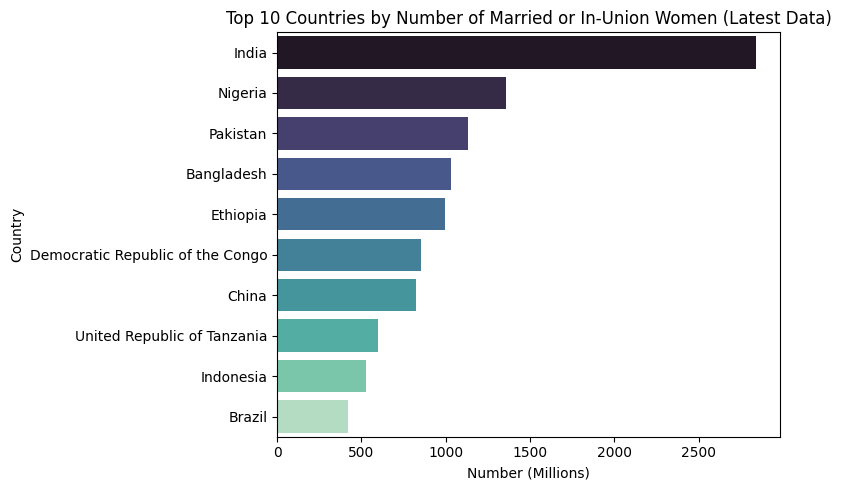

In [35]:
top_number_countries = latest[['Country or area', 'Number']].sort_values('Number', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top_number_countries, y='Country or area', x='Number', palette='mako')
plt.title('Top 10 Countries by Number of Married or In-Union Women (Latest Data)')
plt.xlabel('Number (Millions)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

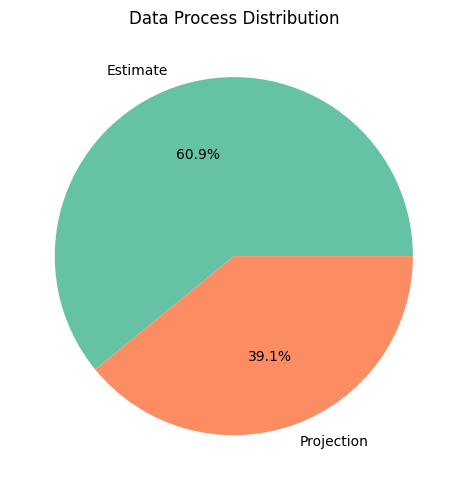

In [12]:
dataprocess_counts = c_10['DataProcess'].value_counts().reset_index()
dataprocess_counts.columns = ['DataProcess', 'Count']

plt.figure(figsize=(5,5))
plt.pie(dataprocess_counts['Count'], labels=dataprocess_counts['DataProcess'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Data Process Distribution')
plt.tight_layout()
plt.show()

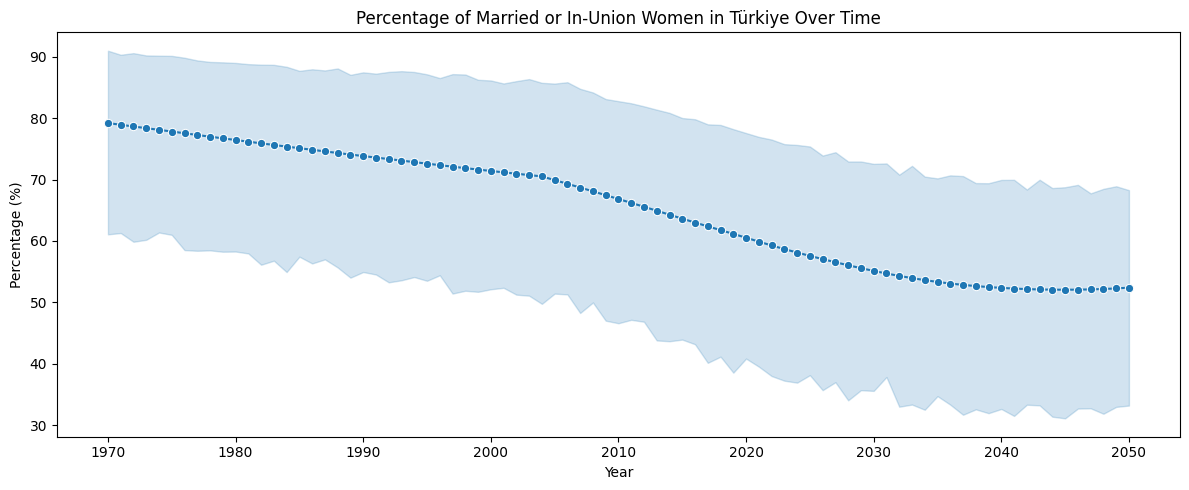

In [14]:
turkiye = c_10[c_10['Country or area'] == 'Türkiye']
plt.figure(figsize=(12,5))
sns.lineplot(data=turkiye, x='Year', y='Percentage', marker='o')
plt.title('Percentage of Married or In-Union Women in Türkiye Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()